### Predict the first Innings score in a ODI

1. Load the dataset from the csv file.
2. Use “groupby” operation, to find the average number of runs, scored by each country,
and represent it on a bar graph.
3. Handle Missing values:
a. If there are null values in continuous numerical column, replace the null values by
the mean of that column
b. If there are null values in ordinal numerical column, replace the null values by the
mode of that column
c. If there are null values in categorical column, replace the null values by the mode
of that column
d. If more than 50%the values in a column are null, then drop that entire column
4. Remove the columns, that you think, do not contribute to the total score, in the first
innings.
5. Convert the categorical columns (if any), to numeric, using one hot encoding/ dummy
encoding.
6. Pick “total” column, as the target variable
7. Select the relevant features.
8. Perform train-test-split
9. Perform Feature scaling
10. Use
a. Use Linear Regression
b. Use Decision Tree Regression
c. Use Random Forest Regression
11. Evaluate the model
12. Apply prediction

#### Import all required packages

In [1]:
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# To build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset from the csv file.

In [2]:
odi_data =pd.read_csv(r"C:\Users\sandeep kumar\Documents\odi.csv")
odi_data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
5,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.6,6,0,0,0,301
6,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.1,6,0,0,0,301
7,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.2,6,0,0,0,301
8,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.3,6,0,0,0,301
9,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,7,0,1.3,7,0,0,0,301


In [3]:
#Describing the datasets

odi_data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [4]:
odi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [5]:
# applying groupby() function to group the data on 'date' value. 
gp = odi_data.groupby(['bat_team','runs']) 

# Let's print the first entries in all the groups formed. 
gp.first() 

mid        date                          venue    bowl_team  \
bat_team    runs                                                                
Afghanistan 0     363  2009-04-19               Willowmoore Park     Scotland   
            1     684  2012-03-29        Sharjah Cricket Stadium  Netherlands   
            2     810  2015-02-22                University Oval    Sri Lanka   
            3     889  2014-03-01  Khan Shaheb Osman Ali Stadium   Bangladesh   
            4     363  2009-04-19               Willowmoore Park     Scotland   
...               ...         ...                            ...          ...   
Zimbabwe    313   392  2009-08-14             Queens Sports Club   Bangladesh   
            319   392  2009-08-14             Queens Sports Club   Bangladesh   
            320   392  2009-08-14             Queens Sports Club   Bangladesh   
            322   392  2009-08-14             Queens Sports Club   Bangladesh   
            323   392  2009-08-14             Queens Sports Club   Bangladesh   

                          batsman            bowler  wickets  overs  \
bat_team    runs                                                      
Afghanistan 0     Noor Ali Zadran         JAR Blain        0    0.1   
            1         Karim Sadiq  T van der Gugten        0    0.1   
            2       Nawroz Mangal        SL Malinga        0    2.6   
            3         Karim Sadiq     Rubel Hossain        0    0.5   
            4     Noor Ali Zadran         JAR Blain        0    0.2   
...                           ...               ...      ...    ...   
Zimbabwe    313    S Matsikenyeri     Mahbubul Alam        5   48.5   
            319    S Matsikenyeri   Shakib Al Hasan        5   49.6   
            320      E Chigumbura   Shakib Al Hasan        6   49.2   
            322         MN Waller   Shakib Al Hasan        6   49.3   
            323      E Chigumbura   Shakib Al Hasan        7   49.5   

                  runs_last_5  wickets_last_5  striker  non-striker  total  
bat_team    runs                                                            
Afghanistan 0               0               0        0            0    295  
            1               1               0        1            0    153  
            2               2               0        2            0    232  
            3               3               0        1            1    254  
            4               4               0        4            0    295  
...                       ...             ...      ...          ...    ...  
Zimbabwe    313            59               1       61           17    323  
            319            65               1       61           23    323  
            320            65               2       61            0    323  
            322            61               2       61            2    323  
            323            54               3       61            0    323  

[6662 rows x 13 columns]

In [6]:
odi_data['bat_team'].unique()

array(['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
       'New Zealand', 'Bangladesh', 'West Indies', 'India', 'Zimbabwe',
       'Ireland', 'Scotland', 'Kenya', 'Bermuda', 'Netherlands', 'Canada',
       'Asia XI', 'Afghanistan', 'United Arab Emirates', 'Hong Kong',
       'Papua New Guinea'], dtype=object)

Total 21 countries are participating in ODI.

In [7]:
odi_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

Means the data have not any NaN value


In [8]:
mean_value=odi_data['runs'].mean()
mean_value

114.80166087677651

In [9]:
Total_run=odi_data['runs'].sum()
Total_run

40283788

The average number of runs, scored by each country

In [10]:
# Total 21 countries are participating in ODI.
Avg_score=Total_run/21
Avg_score

1918275.619047619

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

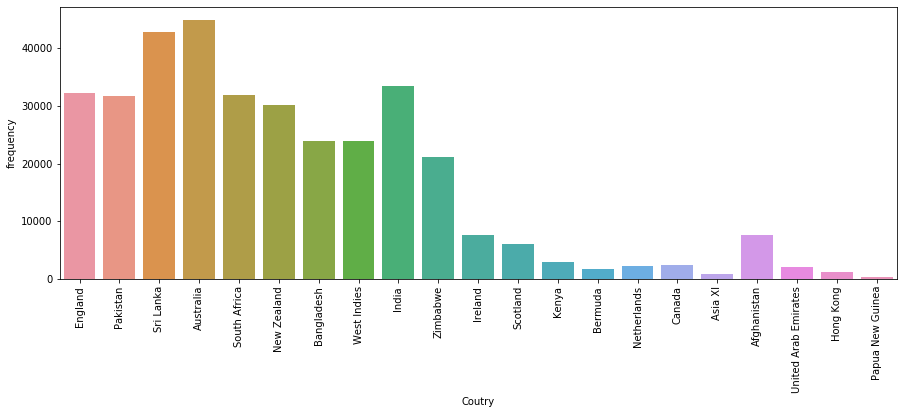

In [11]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x="bat_team",  data = odi_data)
plt.xlabel('Coutry')
plt.ylabel('frequency')
xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

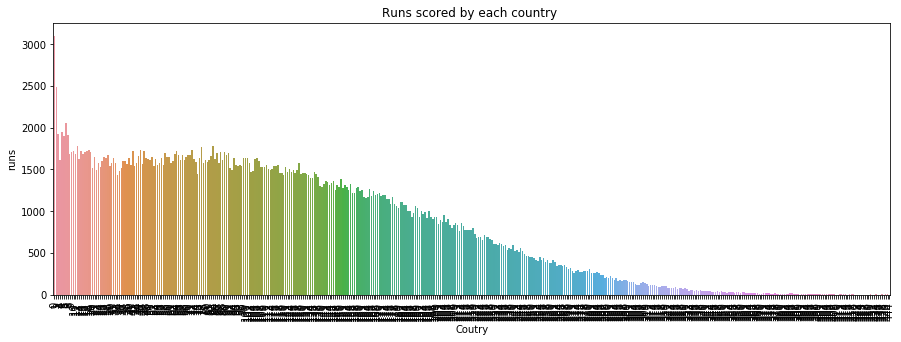

In [12]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x="runs",  data = odi_data)
plt.xlabel('Coutry')
plt.ylabel('runs')
plt.title('Runs scored by each country ')
xticks(rotation=90)

In [13]:
odi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [14]:
odi_data.select_dtypes(include='object').isnull().sum()>0
odi_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [15]:
# Checking  NAN values columnwise

missing_values = (odi_data.isnull().sum()).sort_values(ascending=False)
missing_values

total             0
non-striker       0
striker           0
wickets_last_5    0
runs_last_5       0
overs             0
wickets           0
runs              0
bowler            0
batsman           0
bowl_team         0
bat_team          0
venue             0
date              0
mid               0
dtype: int64

#### It Means that the data have not any NaN value.Se we don't need null values from mean ,median or others.

In [16]:
# Remove date and mid Column 

odi_data.drop(['date','mid'], axis=1, inplace=True)
odi_data.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


### One hot encoding

In [17]:
odi_data['venue'].unique() 

array(['Civil Service Cricket Club, Stormont', 'The Rose Bowl',
       'Trent Bridge', 'Edgbaston', "Lord's", 'Kennington Oval',
       'Riverside Ground', 'Old Trafford', 'Headingley',
       'Brisbane Cricket Ground, Woolloongabba', 'Docklands Stadium',
       'Sydney Cricket Ground', 'Adelaide Oval',
       'Western Australia Cricket Association Ground', 'Bellerive Oval',
       'Jade Stadium', 'Westpac Stadium', 'Rawalpindi Cricket Stadium',
       'Gaddafi Stadium', 'Multan Cricket Stadium', 'National Stadium',
       'Shaheed Chandu Stadium', 'Chittagong Divisional Stadium',
       'Narayanganj Osmani Stadium', 'Queenstown Events Centre',
       'McLean Park', 'Eden Park', 'Feroz Shah Kotla',
       'Nahar Singh Stadium', 'Nehru Stadium, Fatorda', 'Keenan Stadium',
       'Maharani Usharaje Trust Cricket Ground', 'Newlands',
       "St George's Park", 'Kingsmead', 'New Wanderers Stadium',
       'R Premadasa Stadium', 'Sinhalese Sports Club Ground',
       "Antigua Recreation Gro

In [18]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Location'. 
odi_data['venue']= label_encoder.fit_transform(odi_data['venue']) 
odi_data['venue'].unique() 

array([ 19, 121, 123,  31,  58,  53,  97,  84,  42,  13,  25, 120,   1,
       130,   9,  50, 131,  95,  33,  73,  77, 108,  18,  75,  91,  69,
        30,  32,  74,  79,  52,  62,  81, 118,  56,  80,  92, 115,   3,
         8,  89,  99, 129, 112, 116,  87,  76,  54,  41, 119,  70,  39,
        88, 100, 102,  12, 105,  35,  57, 106,  48,  22, 132,  14, 114,
        98,  51,  60,  47,  61,   2,  59,  94,  85,  78,  93, 104,  96,
       126, 128,  38,  16,  90,   4,  20,  82, 113,  68, 107,  83,   5,
         0,  28, 133,  67, 127, 135, 124, 117,  29,  64,  86, 134, 125,
        15,  27,  26,  11,  24,  21, 110,  44,  72, 101,  49,  43, 122,
        17, 109,  66, 111,  46,  36,  63,  40, 103,  55,  10,   7,  45,
         6,  71,  65,  37,  23,  34])

In [19]:
odi_data['bat_team'].unique() 

array(['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
       'New Zealand', 'Bangladesh', 'West Indies', 'India', 'Zimbabwe',
       'Ireland', 'Scotland', 'Kenya', 'Bermuda', 'Netherlands', 'Canada',
       'Asia XI', 'Afghanistan', 'United Arab Emirates', 'Hong Kong',
       'Papua New Guinea'], dtype=object)

In [20]:
odi_data['bat_team']= label_encoder.fit_transform(odi_data['bat_team']) 
odi_data['bat_team'].unique() 

array([ 6, 13, 17,  2, 16, 12,  3, 19,  8, 20,  9, 15, 10,  4, 11,  5,  1,
        0, 18,  7, 14])

In [21]:
odi_data['bowl_team'].unique() 

array(['Ireland', 'Pakistan', 'England', 'Sri Lanka', 'South Africa',
       'Australia', 'New Zealand', 'India', 'West Indies', 'Bangladesh',
       'Zimbabwe', 'Scotland', 'Bermuda', 'Netherlands', 'Canada',
       'Kenya', 'Africa XI', 'United Arab Emirates', 'Hong Kong',
       'Afghanistan', 'Papua New Guinea'], dtype=object)

In [22]:
odi_data['bowl_team']= label_encoder.fit_transform(odi_data['bowl_team']) 
odi_data['bowl_team'].unique() 

array([ 9, 13,  6, 17, 16,  2, 12,  8, 19,  3, 20, 15,  4, 11,  5, 10,  1,
       18,  7,  0, 14])

In [23]:
odi_data['batsman'].unique() 

array(['ME Trescothick', 'EC Joyce', 'AJ Strauss', 'PD Collingwood',
       'IR Bell', 'JWM Dalrymple', 'GO Jones', 'G Chapple', 'LE Plunkett',
       'KP Pietersen', 'R Clarke', 'CMW Read', 'J Lewis', 'SCJ Broad',
       'Mohammad Hafeez', 'Shahid Afridi', 'Younis Khan',
       'Mohammad Yousuf', 'Inzamam-ul-Haq', 'Shoaib Malik',
       'Abdul Razzaq', 'Kamran Akmal', 'Shoaib Akhtar', 'Naved-ul-Hasan',
       'Imran Farhat', 'Iftikhar Anjum', 'Mohammad Asif', 'WU Tharanga',
       'ST Jayasuriya', 'DPMD Jayawardene', 'KC Sangakkara', 'TM Dilshan',
       'RP Arnold', 'CK Kapugedera', 'WPUJC Vaas', 'SL Malinga',
       'CRD Fernando', 'M Muralitharan', 'MF Maharoof', 'HMCM Bandara',
       'AN Cook', 'VS Solanki', 'TT Bresnan', 'AC Gilchrist',
       'RT Ponting', 'SM Katich', 'DR Martyn', 'A Symonds', 'MJ Clarke',
       'MEK Hussey', 'B Lee', 'NW Bracken', 'SR Clark', 'GD McGrath',
       'PA Jaques', 'BJ Haddin', 'JR Hopes', 'BR Dorey', 'J Mubarak',
       'MS Atapattu', 'WCA Ganega

In [24]:
odi_data['batsman']= label_encoder.fit_transform(odi_data['batsman']) 
odi_data['batsman'].unique() 

array([520, 242,  41, 650, 341, 420, 289, 265, 484, 459, 677, 169, 359,
       759, 576, 816, 928, 590, 352, 827,  70, 465, 826, 631, 347, 345,
       575, 915, 799, 221, 439, 860, 711, 163, 913, 774, 175, 500, 522,
       317,  51, 901, 871,  23, 724, 778, 226,  11, 526, 521, 101, 622,
       790, 278, 645, 111, 413, 124, 361, 557, 906, 454, 273, 308, 392,
       369, 309, 779, 402, 651, 194, 479, 401, 785, 652, 312, 754, 166,
       108, 214, 382, 762, 808, 890, 925, 586, 609, 731, 818,  78, 574,
       322, 469, 468, 583,  85, 568, 837, 445, 460, 882,  71, 815, 152,
       185, 721, 717, 743, 916, 227, 191, 336, 255, 495, 441, 266, 896,
       679, 929, 497, 772, 340, 559, 326, 713, 752, 533, 639,   3, 335,
       464, 398, 715, 922, 900, 544, 768,  19, 565, 699,  37, 795, 385,
       686, 462, 319, 839, 155, 125, 238, 288, 451, 606, 720, 642, 243,
       109, 207, 381, 897, 843,  38, 547, 176,  16, 744, 725, 200, 147,
       538, 112, 272, 494, 914, 409, 244, 610,  20, 448,  63, 23

In [25]:
odi_data['bowler'].unique() 

array(['DT Johnston', 'D Langford-Smith', 'JF Mooney', "KJ O'Brien",
       'PJK Mooney', 'WK McCallan', 'Shoaib Akhtar', 'Mohammad Asif',
       'Abdul Razzaq', 'Naved-ul-Hasan', 'Shahid Afridi',
       'Mohammad Hafeez', 'Shoaib Malik', 'SCJ Broad', 'J Lewis',
       'SI Mahmood', 'JWM Dalrymple', 'PD Collingwood', 'MH Yardy',
       'KP Pietersen', 'SJ Harmison', 'LE Plunkett', 'TT Bresnan',
       'WPUJC Vaas', 'SL Malinga', 'CRD Fernando', 'MF Maharoof',
       'HMCM Bandara', 'ST Jayasuriya', 'Kabir Ali', 'VS Solanki',
       'IR Bell', 'TM Dilshan', 'SM Pollock', 'GJP Kruger', 'AJ Hall',
       'M Zondeki', 'JH Kallis', 'GC Smith', 'DW Steyn', 'J Botha',
       'JJ van der Wath', 'CK Langeveldt', 'B Lee', 'NW Bracken',
       'BR Dorey', 'JR Hopes', 'A Symonds', 'GB Hogg', 'MJ Clarke',
       'GD McGrath', 'BJ Hodge', 'SR Clark', 'PDRL Perera',
       'KMDN Kulasekara', 'M Muralitharan', 'KD Mills', 'SE Bond',
       'CL Cairns', 'JDP Oram', 'DL Vettori', 'SB Styris', 'IK Pathan

In [26]:
odi_data['bowler']= label_encoder.fit_transform(odi_data['bowler']) 
odi_data['bowler'].unique() 

array([168, 137, 279, 325, 491, 686, 621, 428,  54, 474, 616, 429, 622,
       571, 262, 577, 308, 486, 385, 333, 579, 350, 658, 688, 582, 130,
       383, 230, 602, 339, 681, 250, 653, 585, 211,  29, 369, 281, 201,
       170, 261, 286, 121,  85, 467,  98, 302,  11, 200, 386, 205,  92,
       593, 487, 330, 365, 321, 573, 123, 274, 158, 567, 249, 564, 701,
        15, 595, 675, 535, 400, 188, 244, 277, 164, 114, 532, 538, 322,
       422, 635, 477, 435,  69,  60, 664, 420, 384, 382, 150, 615,  56,
       666, 547, 387, 278, 392, 455, 304, 156, 690, 539, 290,   2, 243,
       236, 700, 195, 391, 680, 597, 366, 511, 522, 292, 253, 149, 177,
       453, 638, 117, 481, 212, 111, 138, 405, 331, 232, 542, 403, 671,
       171, 490, 267, 125, 162, 198, 528, 318, 561, 285, 516, 145, 358,
       247, 108, 174, 199, 570, 560, 685, 152, 533, 646, 501, 159, 359,
       618, 376,  59,  20, 667, 291,  39, 214, 559, 407, 157, 144, 655,
       489, 357, 287, 225, 590, 431, 223, 335, 568, 541, 415, 68

In [27]:
odi_data.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,19,6,9,520,168,0,0,0.1,0,0,0,0,301
1,19,6,9,520,168,0,0,0.2,0,0,0,0,301
2,19,6,9,520,168,4,0,0.3,4,0,0,0,301
3,19,6,9,520,168,6,0,0.4,6,0,0,0,301
4,19,6,9,520,168,6,0,0.5,6,0,0,0,301


In [28]:
odi_data['total'].unique() 

array([301, 271, 235, 154, 257, 319, 261, 318, 321, 228, 245, 281, 344,
       309, 218, 233, 282, 263, 221, 255, 224, 274, 265, 368, 288, 266,
       161, 286, 118, 212, 195, 250, 124, 200, 276, 324, 203, 226, 294,
       223, 289, 254, 246, 434, 130, 151, 242, 152, 198, 217, 197, 269,
       241, 334, 353, 209, 191, 358, 279, 413, 202, 186, 331, 136, 363,
       377, 177, 322, 104, 303, 174, 251, 247, 356, 143, 219,  91, 193,
       243,  77, 230, 348, 300, 149, 248, 343, 290, 155, 110, 292, 205,
       210, 270, 252, 168, 184, 302,  85, 285, 231,  80, 125, 253, 234,
       165, 169, 213, 272, 249, 240, 258, 392, 351, 107, 153, 262, 148,
       336, 346, 201, 162, 418, 238, 225, 278, 329, 316, 187, 178, 220,
       146, 194, 268, 341, 259, 284, 317, 337, 211, 159, 236, 179, 239,
       173, 137, 196, 189, 307, 182, 275,  83, 296, 306, 291, 175,  93,
       340, 206, 323, 183, 167, 232, 273, 117, 347, 244, 181, 357, 374,
       299, 283, 332, 308, 115, 142, 237, 330, 222, 315, 260, 17

### Preparing Test and Train Set

In [29]:
X=odi_data.drop('total',axis=1)
y=odi_data.total

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker
105561,119,16,6,315,658,44,2,9.4,18,2,23,4
29203,54,6,16,552,585,1,0,2.4,1,0,1,0
33086,120,12,2,785,205,37,2,12.4,22,0,17,11
317337,81,16,17,674,483,72,1,11.3,35,0,47,24
302025,44,8,16,746,364,23,1,6.5,20,0,13,5


In [31]:
X_train.shape

(280719, 12)

In [32]:
X_test.shape

(70180, 12)

In [33]:
X_test.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker
165626,20,11,9,854,325,8,1,2.6,8,1,1,0
326566,103,3,12,876,304,86,0,18.2,18,0,41,35
110090,94,13,17,816,365,87,7,27.1,20,3,7,2
39941,12,19,2,721,597,74,4,19.6,11,0,14,3
166546,102,12,8,527,8,23,1,6.4,11,1,9,8


#### Feature scaling

In [34]:
# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker'],
      dtype='object')

### LINEAR REGRESSION

In [35]:
lm=LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
predictions=lm.predict(X_test)

In [38]:
metrics.r2_score(y_test,predictions)

0.5333524291384211

In [39]:
my_model = xgb.XGBRegressor(n_estimators=1000,learning_rate = 0.1)

In [40]:
my_model.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [41]:
predictions1 = my_model.predict(X_test)

In [42]:
metrics.r2_score(y_test,predictions1)

0.9316691940387186

### Decision Tree Regression


In [47]:
X = odi_data['venue'].values
y = odi_data['total'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [49]:
# Fitting Decision Tree Regression to the odi_data.
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([232.82432815, 290.47942843, 276.9575299 , ..., 246.46536412,
       235.04945968, 239.27893309])

In [52]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,260,232.824328
1,269,290.479428
2,240,276.957530
3,221,272.101258
4,234,234.000000
...,...,...
17540,230,254.557811
17541,312,238.904274
17542,306,246.465364
17543,206,235.049460


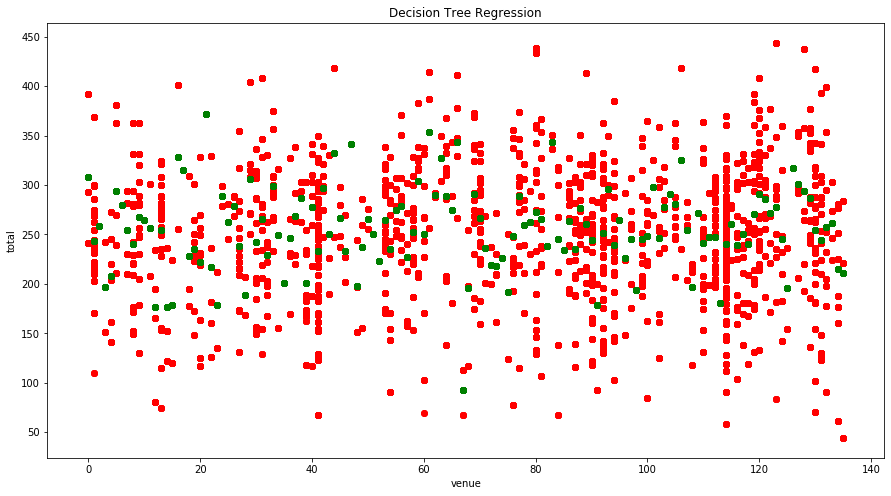

In [53]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.rcParams['figure.figsize'] = (15,8)
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('venue')
plt.ylabel('total')
plt.show()

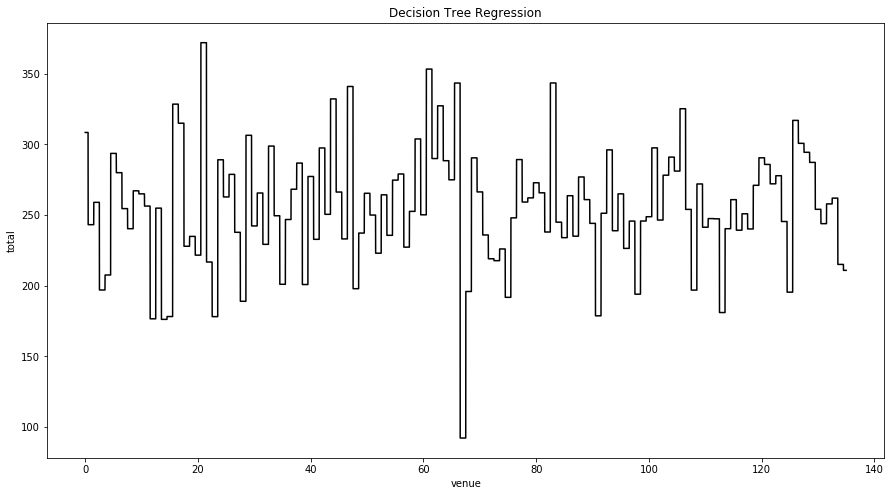

In [54]:
plt.rcParams['figure.figsize'] = (15,8)
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('venue')
plt.ylabel('total')
plt.show()

In [55]:
#Prediction
y_pred=regressor.predict([[6.5]])
y_pred

array([280.])

###  Random Forest Regression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [57]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [58]:
regressor.fit(X.reshape(-1,1), y.reshape(-1,1))   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

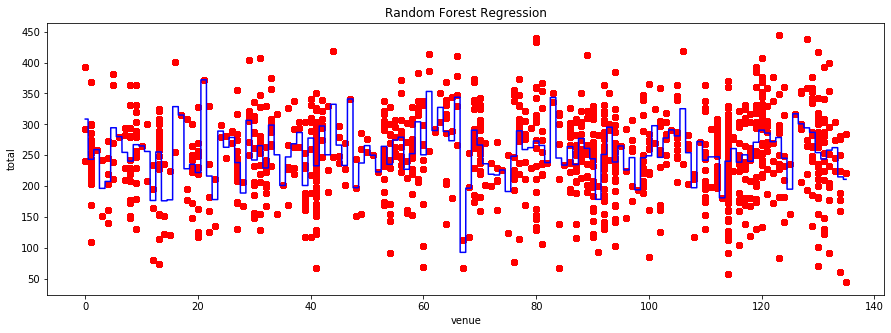

In [59]:
X_grid = np.arange(min(X), max(X), 0.01)                      
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data
plt.rcParams['figure.figsize'] = (15,5)
plt.scatter(X, y, color = 'red')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
plt.title('Random Forest Regression') 
plt.xlabel('venue') 
plt.ylabel('total') 
plt.show()

In [60]:
y_pred=regressor.predict([[6.5]])
y_pred

array([280.])

As we can see Prediction value for Decision Tree Regression and Random Forest Regression are same which value is array( [ 280. ] )